In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import numpy as np
from scipy.interpolate import make_interp_spline
import calcTimeNow

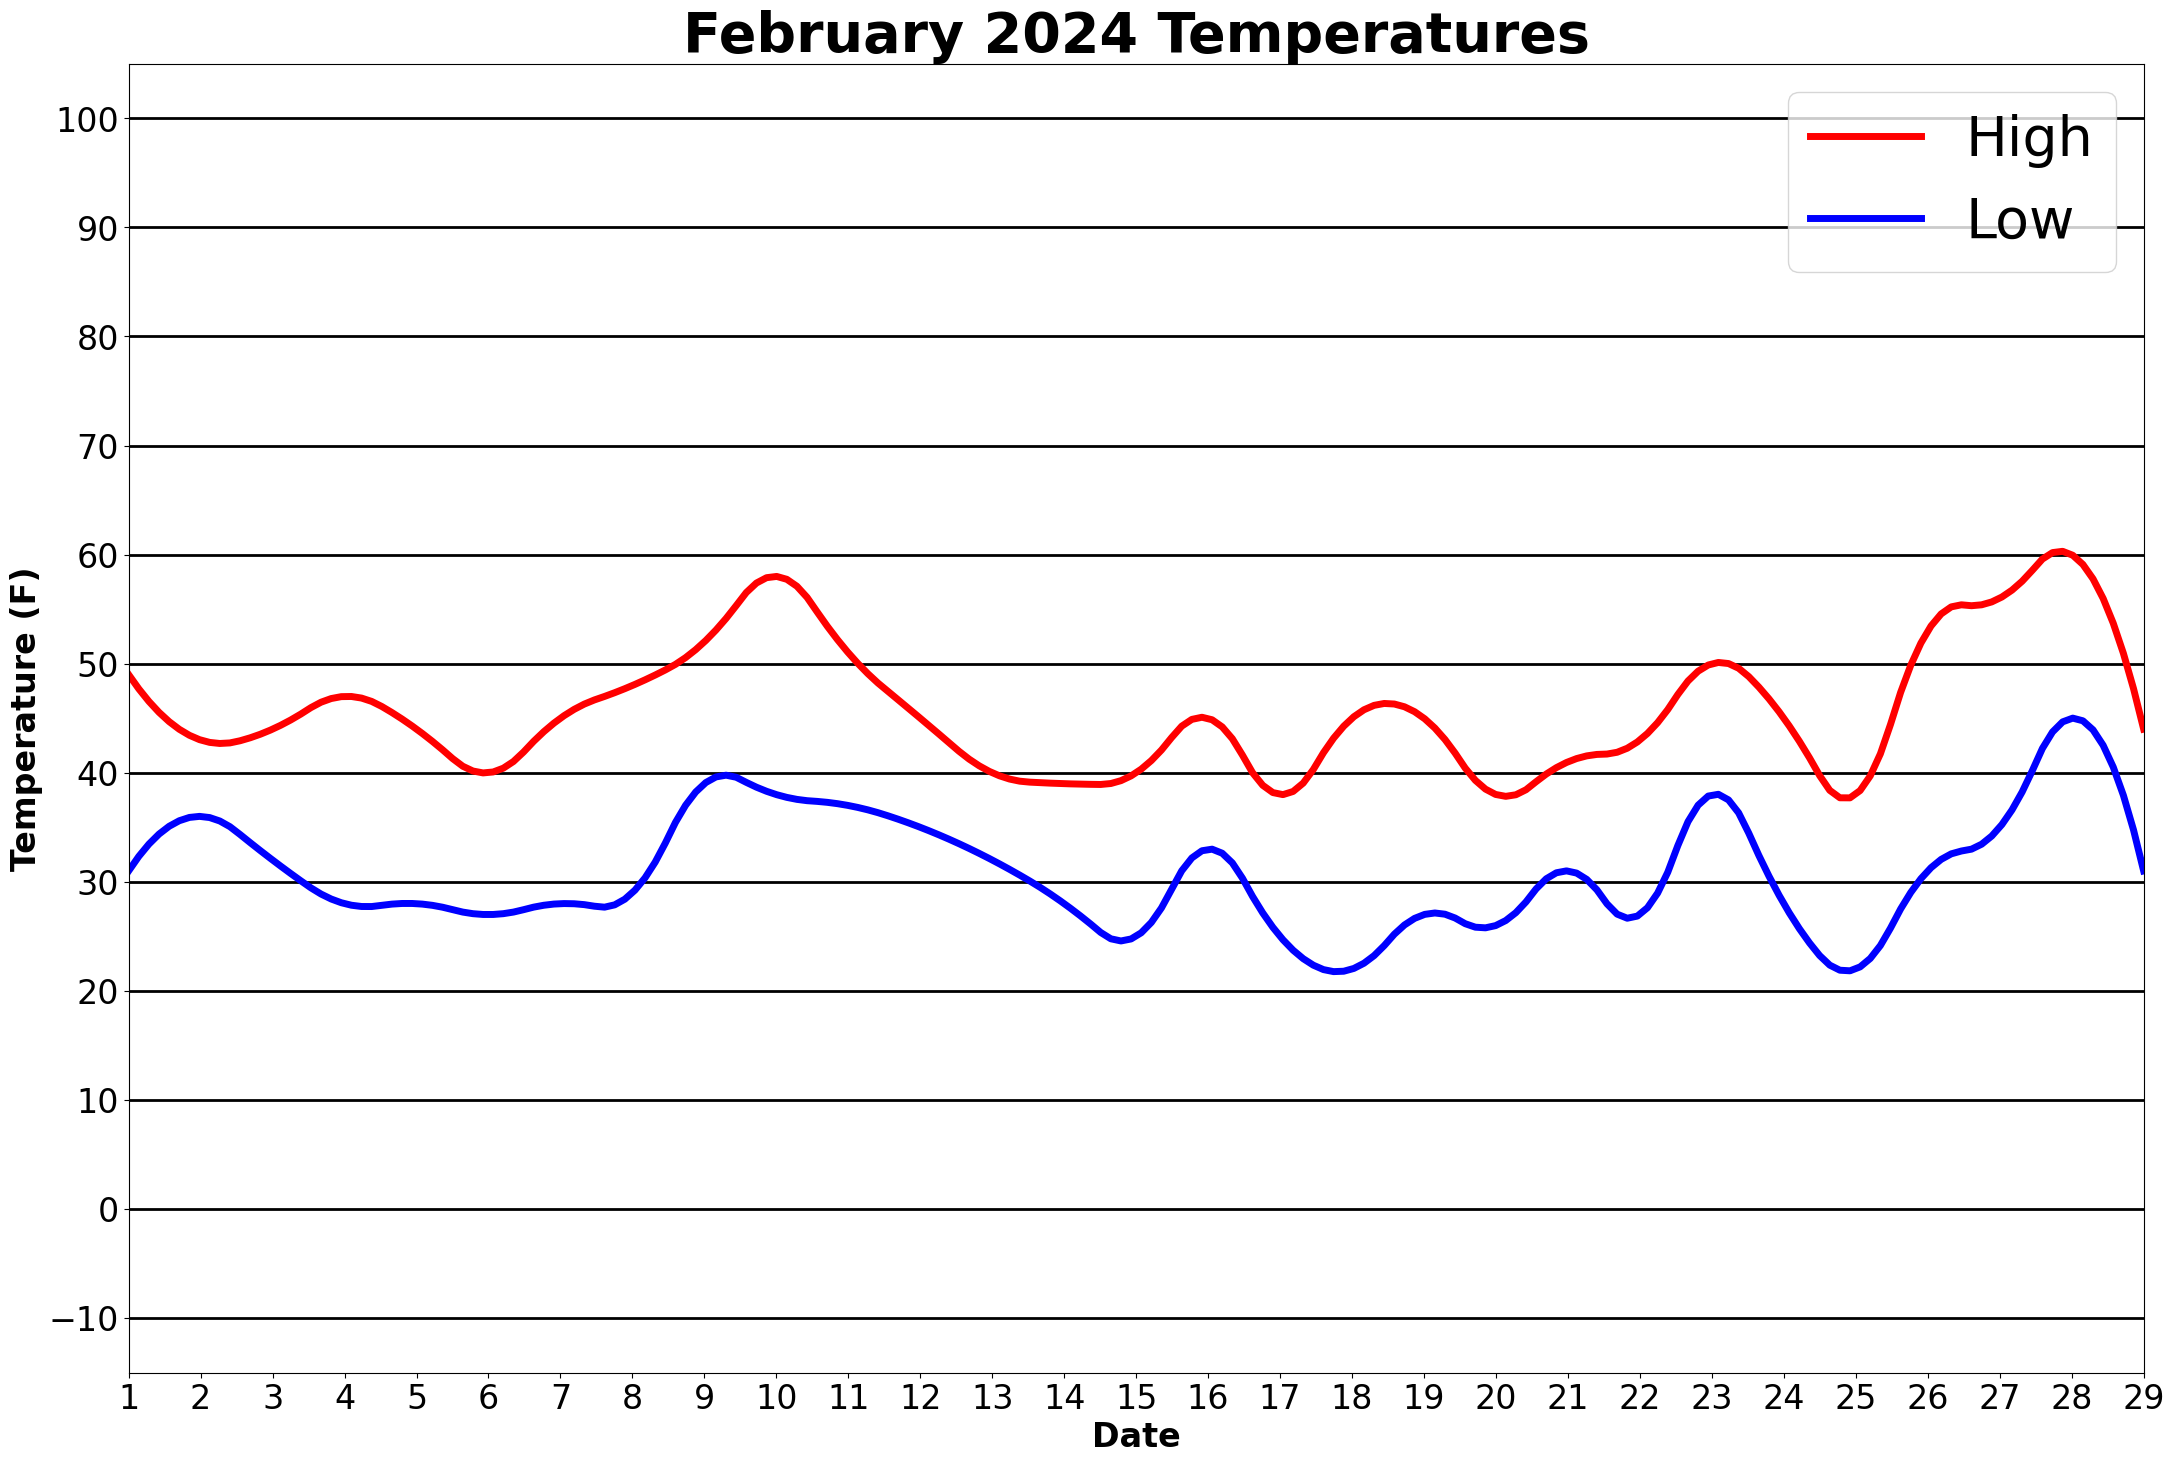

In [3]:
#
# Make some graphs - temperature line plots first
# For just one month
#

# Determine the date

x = calcTimeNow.calcTimeNow()

month_name = 'February'
addyear = '2024'
r = 29

path = '/Volumes/Elements/code/readexcel/'
wxdata = f'{path}{month_name}_{addyear}.xlsx'
getWXdata = pd.read_excel(wxdata)
getWXdata = getWXdata.drop((r), axis=0)   
   
HI = getWXdata['High']
LO = getWXdata["Low"]
DATE = getWXdata["Date"]
   
y = HI.to_numpy()
y1 = LO.to_numpy()
x = DATE.to_numpy()

#define x as 200 equally spaced values between the min and max of original x 
xnew = np.linspace(x.min(), x.max(), 200) 

#define spline
HIspl = make_interp_spline(x, y, k=2)
y_smooth = HIspl(xnew)
LOspl = make_interp_spline(x, y1, k=2)
y1_smooth = LOspl(xnew)

#Plot the results in matplotlib

plt.figure(figsize= (26, 17))
plt.locator_params(axis='x', nbins= r)
plt.xlim(1, r)
plt.ylim(-15, 105)
plt.xticks(fontsize=24)
plt.xlabel('Date', fontsize=24, fontweight ='bold')
plt.yticks(fontsize=24)
plt.ylabel('Temperature (F)', fontsize=24, fontweight ='bold')
plt.locator_params(axis='y', nbins=20)
plt.title(f'{month_name} {addyear} Temperatures', fontsize=40, fontweight ='bold')
plt.grid(axis = "y", linewidth = 2.0, color = 'black')
plt.plot(xnew,y_smooth,color = "red", linewidth =5, label ="High")
plt.plot(xnew,y1_smooth,color = "blue", linewidth =5, label ="Low")
plt.legend(fontsize=40)
plt.savefig(f'{path}{month_name}temps_{addyear}')

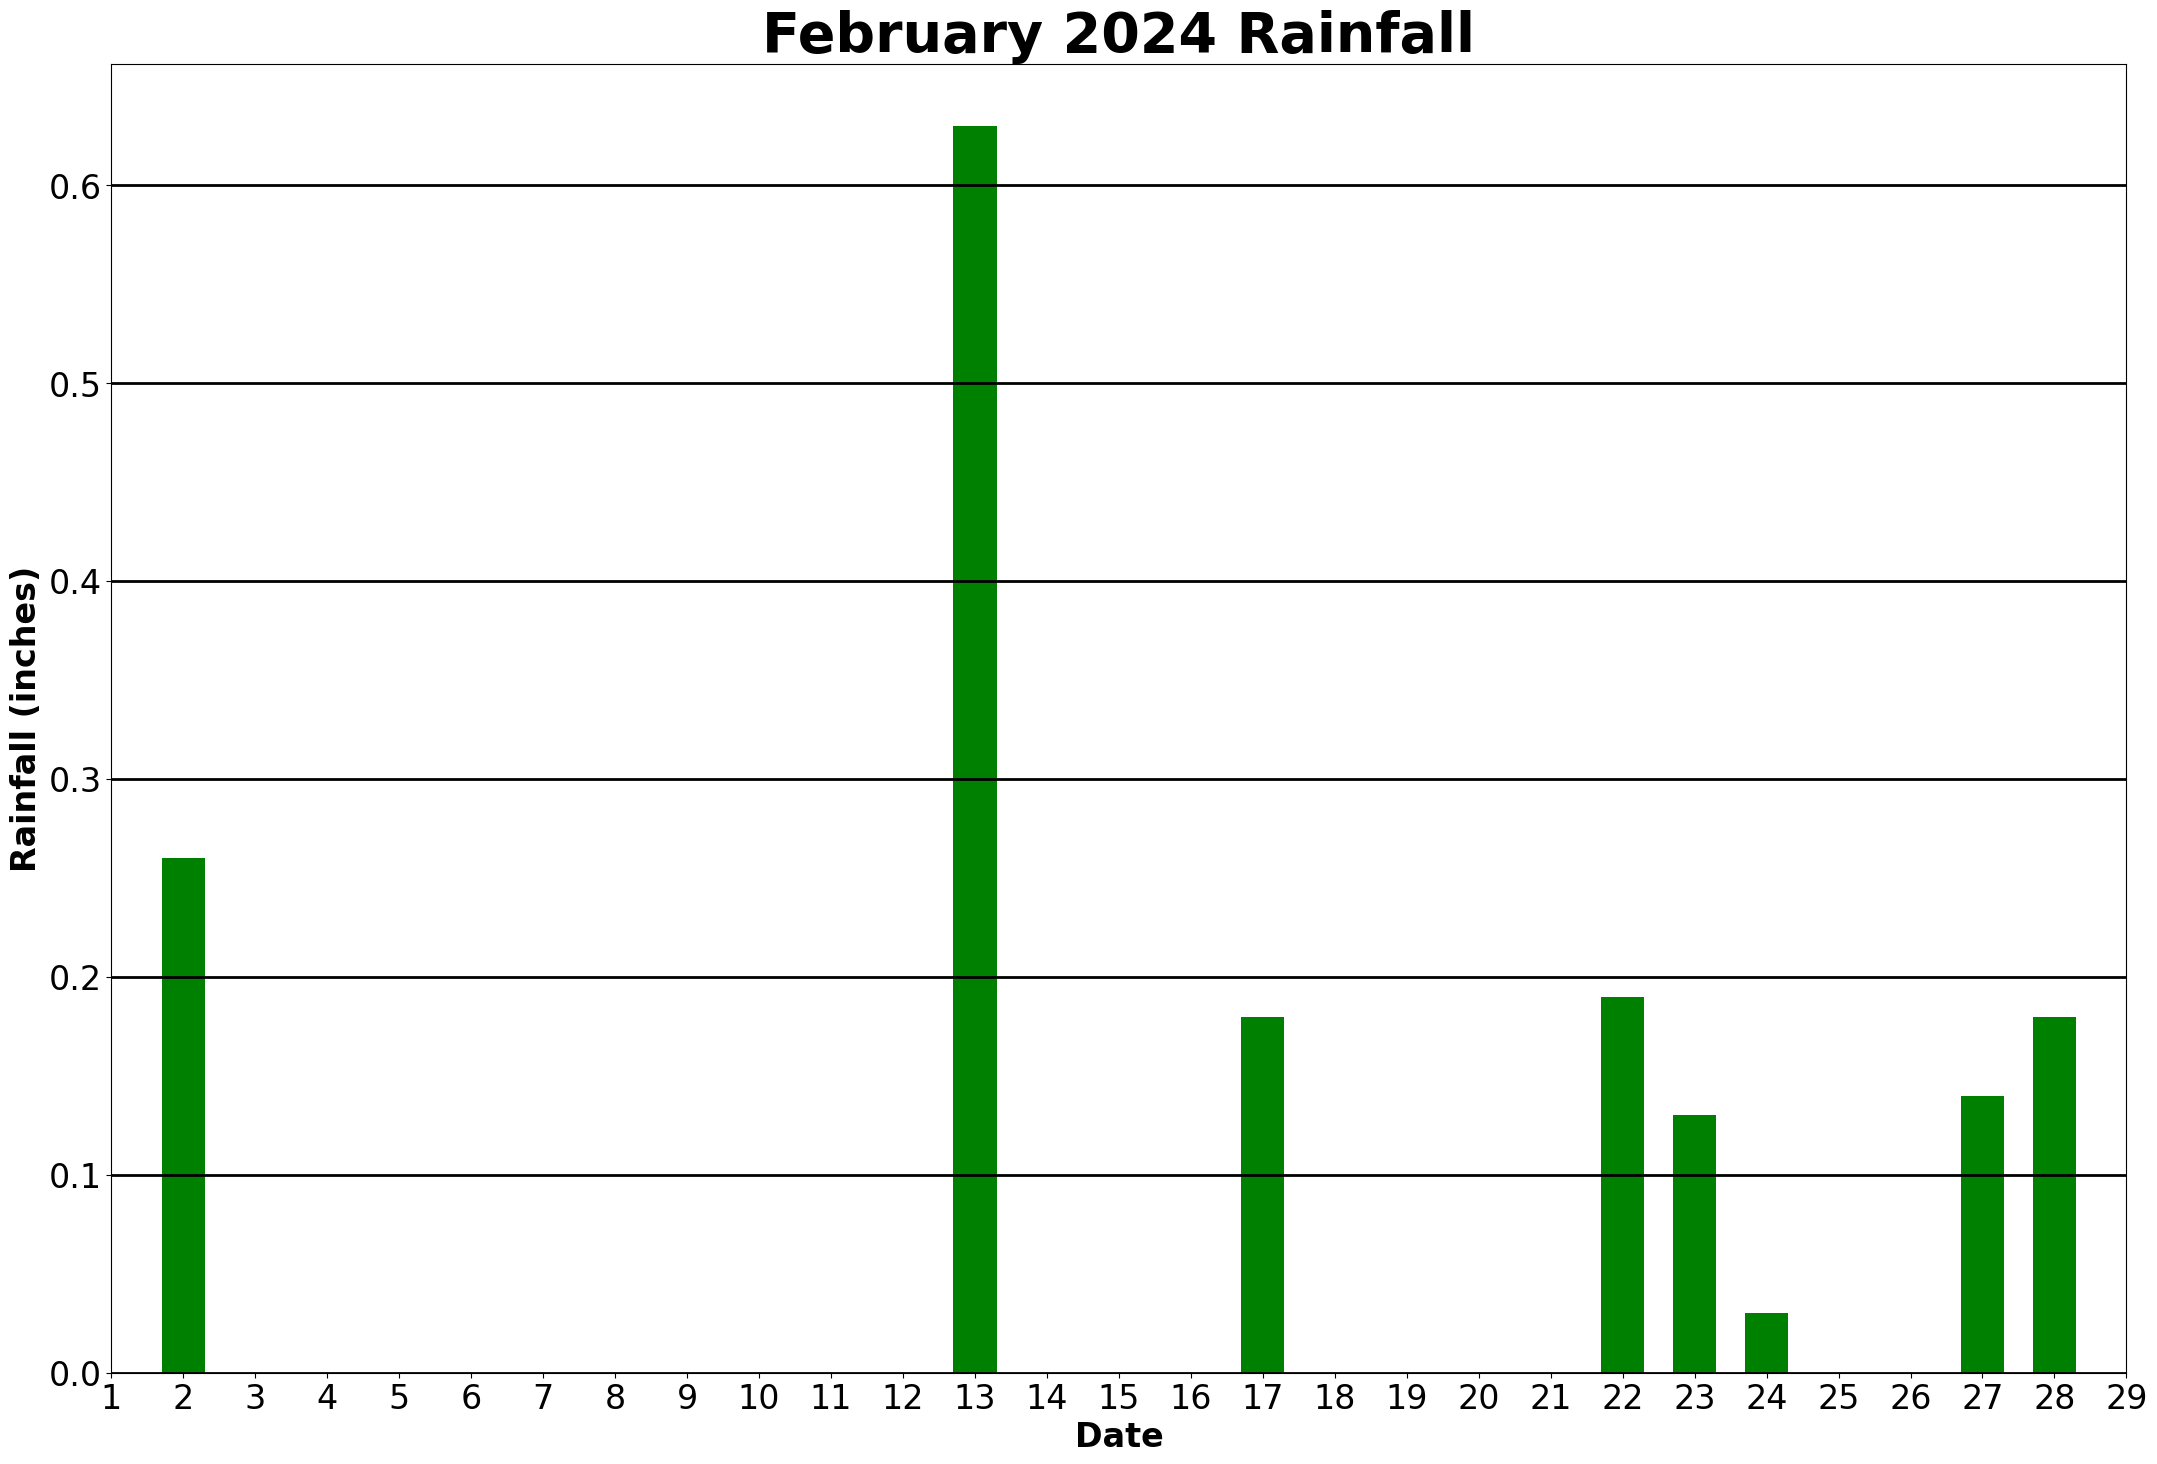

In [4]:
#
# make some graphs - now some rainfall bar plot
# For just one month
#
import pandas as pd

month_name = 'February'
addyear = '2024'
r = 29


    #Set up data
path = '/Volumes/Elements/code/readexcel/'
wxdata = f'{path}{month_name}_{addyear}.xlsx'
getWXdata = pd.read_excel(wxdata)
getWXdata = getWXdata.drop((r), axis=0)      
    
#Plot the results in matplotlib
plt.figure(figsize=(26, 17))
plt.grid(axis = "y", linewidth = 2.0, color = 'black')
plt.locator_params(axis='x', nbins= r)
plt.xlim(1, r)
plt.xticks(fontsize=24)
plt.xlabel('Date', fontsize=24, fontweight ='bold')
plt.yticks(fontsize=24)
plt.ylabel('Rainfall (inches)', fontsize=24, fontweight ='bold')
plt.locator_params(axis='y', nbins=10)
plt.title(f'{month_name} {addyear} Rainfall', fontsize=40, fontweight ='bold')
plt.bar(getWXdata["Date"],getWXdata["Rainfall"], color = "green", width= 0.6)
plt.savefig(f'{path}{month_name}rainfall_{addyear}') 